# "What If I Bought This?": Inflation Adjusted Equity Growth Analysis
## Case Study: Monthly Dollar-Cost Investing vs Cash Savings
*This project was completed as a self-directed financial analysis exercise to develop practical Python-based investment analysis and data-handling skills.*

## Project Overview

**Objective:** <br>
This project compares the long-term financial outcomes of saving a fixed monthly amount as cash versus investing the same amount into an ASX-listed asset using a dollar-cost averaging strategy. All results are adjusted for inflation to reflect real purchasing power.

The analysis is designed to highlight the opportunity cost of holding cash and the compounding effects of long-term investing.

**Scope:** <br>
- **Market:** Australian Securities Exchange (ASX)
- **Asset:** ASX-listed ETF or equity (user-defined, e.g. GOLD.AX)
- **Investment Method:** Monthly dollar-cost averaging
- **Comparison:** Cash savings vs investment growth
- **Time Horizon:** User-defined (e.g. 2019-01-01)

**Methodology:** <br>
The analysis follows three core steps:
1. Monthly cash contributions are accumulated without investment returns.
2. The same monthly contributions are invested into the selected asset at month-end prices.
3. Both cash and investment values are adjusted for inflation to allow comparison in real terms.

Results are interpreted from an investor decision-making perspective rather than a purely academic framework.


## Data Source & Assumptions

### Data Source
Yahoo Finance (via <code>yfinance</code> Python library)

### Assumptions
- Prices are adjusted for corporate actions (splits and dividends)
- Contributions are made at the end of each month
- Inflation is assumed to be constant at 2.5% per annum
- Inflation is applied monthly and compounded
- No transaction costs or taxes are included

### Limitations

- Inflation is modelled using a constant rate rather than actual CPI data
- Results are based solely on historical price performance
- Does not account for interest earned on cash balances
- Behavioural factors (e.g. missed contributions) are not modelled

## Data Collection

The following section obtains the price data for the user-defined 

In [115]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# inputs
ticker = "GOLD.AX"
start_date = "2019-01-01"
monthly_investment = 10

annual_inflation = 0.025  # 2.5% inflation assumption
monthly_inflation = (1 + annual_inflation) ** (1/12) - 1

In [116]:
# download prices
data = yf.download(ticker, start=start_date, auto_adjust=True)

# converting daily prices to month-end prices
monthly_prices = data['Close'].squeeze().resample('ME').last()

[*********************100%***********************]  1 of 1 completed


Cash-only savings (no investing)

In [117]:
# number of months
months = len(monthly_prices)

# nominal cash saved over time (no returns)
cash_nominal = monthly_investment * pd.Series(
    range(1, months + 1),
    index=monthly_prices.index
)

Investment growth (dollar-cost averaging)

In [118]:
shares = 0
investment_nominal = []

for price in monthly_prices:
    # buy shares each month
    shares += monthly_investment / price

    # total portfolio value at that month
    investment_nominal.append(shares * price)

investment_nominal = pd.Series(investment_nominal, index=monthly_prices.index)

Adjusting both for inflation (real values)

In [119]:
# create an inflation adjustment factor for each month
inflation_factor = (1 + monthly_inflation) ** pd.Series(
    range(months),
    index=monthly_prices.index
)

# convert nominal values to real (today's dollars)
cash_real = cash_nominal / inflation_factor
investment_real = investment_nominal / inflation_factor

Combining results

In [120]:
comparison = pd.DataFrame({
    'Cash (Real)': cash_real,
    'Investment (Real)': investment_real
})

Plotting the comparison

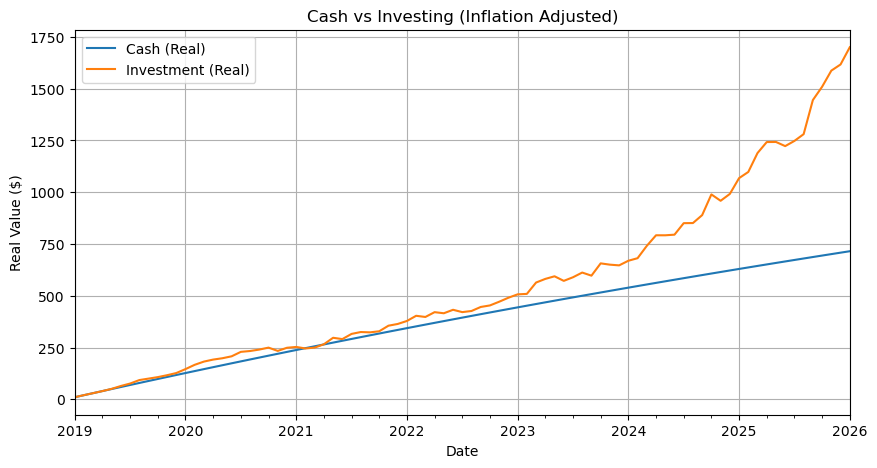

Extra made by investing (inflation-adjusted): $985


In [121]:
comparison.plot(figsize=(10,5), title="Cash vs Investing (Inflation Adjusted)")
plt.ylabel("Real Value ($)")
plt.grid(True)
plt.show()

extra_made_today = comparison['Investment (Real)'].iloc[-1] - comparison['Cash (Real)'].iloc[-1]

print(f"Extra made by investing (inflation-adjusted): ${extra_made_today:,.0f}")